==================== Part 1: Basic Function ====================

In [1]:
from ex1 import *
print('Running warmUpExercise ... ');
print('5x5 Identity Matrix: ');
warmUpExercise()

Running warmUpExercise ... 
5x5 Identity Matrix: 


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

======================= Part 2: Plotting =======================

Plotting Data ...


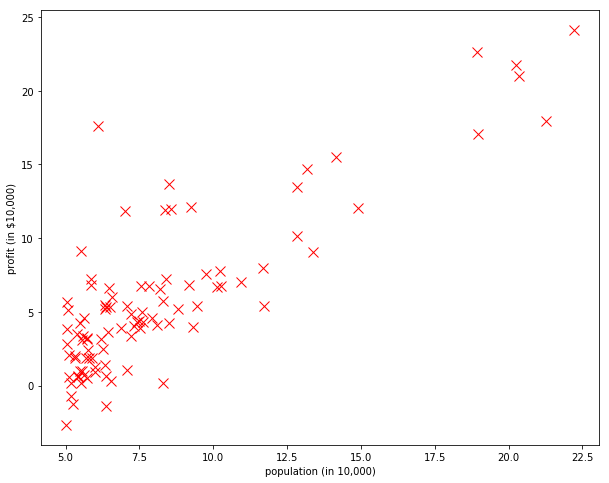

In [2]:
print('Plotting Data ...')
import pandas as pd
data = pd.read_csv('ex1data1.txt', header=None)
X = data[0]
y = data[1]
m = len(y) # number of training examples

# Plot Data
plotData(X, y);

=================== Part 3: Cost and Gradient descent ===================

In [18]:
X = np.column_stack((np.ones((m, 1)), data[0])); # Add a column of ones to x
theta = np.zeros((2, 1)) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

print('Testing the cost function ...')
# compute and display initial cost
J = computeCost(X, y, theta)
# fprintf('With theta = [0 ; 0]\nCost computed = %f\n', J);
# fprintf('Expected cost value (approx) 32.07\n');

# % further testing of the cost function
# J = computeCost(X, y, [-1 ; 2]);
# fprintf('\nWith theta = [-1 ; 2]\nCost computed = %f\n', J);
# fprintf('Expected cost value (approx) 54.24\n');

# fprintf('Program paused. Press enter to continue.\n');
# pause;

# fprintf('\nRunning Gradient Descent ...\n')
# % run gradient descent
# theta = gradientDescent(X, y, theta, alpha, iterations);

# % print theta to screen
# fprintf('Theta found by gradient descent:\n');
# fprintf('%f\n', theta);
# fprintf('Expected theta values (approx)\n');
# fprintf(' -3.6303\n  1.1664\n\n');

# % Plot the linear fit
# hold on; % keep previous plot visible
# plot(X(:,2), X*theta, '-')
# legend('Training data', 'Linear regression')
# hold off % don't overlay any more plots on this figure

# % Predict values for population sizes of 35,000 and 70,000
# predict1 = [1, 3.5] *theta;
# fprintf('For population = 35,000, we predict a profit of %f\n',...
#     predict1*10000);
# predict2 = [1, 7] * theta;
# fprintf('For population = 70,000, we predict a profit of %f\n',...
#     predict2*10000);

Testing the cost function ...


NameError: name 'computeCost' is not defined